# GSIBerror - Uma classe para ler e plotar os records da matriz B do GSI

Neste notebook, é feita uma demonstração da classe `Berror` para a leitura dos records e atributos de matrizes de covariâncias compatíveis com o GSI (formato `.gcv`). Não foram testadas matrizes regionais, mas deve ser possível utilizar esta classe para inspecioná-las também.

Antes de utilizar a classe, certifique-se de que ela está acessível. Geralmente, ela pode ser colocada no mesmo diretório em que se está trabalhando.

Para utilizar a classe, carregue-a com o comando a seguir:

In [1]:
from GSIBerror import Berror

Os módulos a seguir são opcionais e podem ser carregados caso o usuário queira plotar os records da matriz. O módulo `cartopy` é carregado para plotar as linhas de costa dos records relacionados com a `sst` (temperatura da superfície do mar) apenas, visto que os demais records, são dependentes apenas das latitudes:

In [2]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

A seguir, define-se o nome do arquivo a ser lido. No exemplo dado neste notebook, são abertas duas matrizes, `fncep` (matriz do NCEP) e `fcptec` (matriz do modelo BAM). Ambas as matrizes possuem dimensões distintas:

In [5]:
path = '/dados/das/pesq1/BAM.berror/xc50/old/'

bcptec = 'gsir4.berror_stats.gcv.BAM.TQ0062L028'
bncep = 'global_berror.l64y386.f77-ncep-dtc.gcv'

fncep = os.path.join(path, bncep)
fcptec = os.path.join(path, bcptec)

Para utilizar a classe, é necessário criar uma instância para cada uma das matrizes a serem lidas:

In [6]:
ncep_b = Berror(fncep)
cptec_b = Berror(fcptec)

O método `read_records` é utilizado para ler todos os records (coeficientes de regressão horizontais, comprimentos de escala e variâncias) das matrizes e os seus respectivos atributos (número de pontos de latitude, longitude, níveis verticais) . A documentação deste método pode ser acessada com o comando:

```Python
help(Berror.read_records)
```

In [7]:
help(Berror.read_records)

Help on function read_records in module GSIBerror:

read_records(self)
    read_records
    ------------
    
    Este método lê os três primeiros records da matriz de covariâncias (nlat, nlon e nsig) e
    os utiliza para calcular o tamanho dos demais records da matriz. Todos os atributos da matriz lida
    são providos por esta função. A plotagem dos records é feita a partir do método 'plot()' do xarray;
    dependendo do uso, pode ser necessário carregar os módulos matplotlib e cartopy.
    
    Parâmetros de entrada
    ---------------------
        Nenhum.
    
    Resultado
    ---------
        bfile: objeto criado com os records e os atributos da matriz de covariâncias (veja a lista a seguir)
               
    Atributos disponíveis
    ---------------------
        file_name         : string com o nome do arquivo lido
        nlat              : integer com o número de pontos de latitude
        nlon              : integer com o número de pontos de longitude
        nsig     

Leituras dos records e atributos das matrizes a partir das instâncias `ncep_b` e `cptec_b` criadas:

In [9]:
ncep_b.read_records()
cptec_b.read_records()

Para verificar os atributos das matrizes, basta utilizar a instância da classe para a matriz desejada:

* `nlat`: número de pontos de latitude;
* `nlon`: número de pontos de longitude;
* `nsig`: número de níveis verticais.

In [10]:
ncep_b.nlat, ncep_b.nlon, ncep_b.nsig

(386, 768, 64)

In [11]:
cptec_b.nlat, cptec_b.nlon, cptec_b.nsig

(98, 192, 28)

Para verificar os records das matrizes, basta utilizar a instância da classe para a matriz desejada:

* `balprojs`: coeficientes de regressão horizontais;
* `amplitudes`: variâncias das variáveis de controle;
* `hscales`: comprimentos de escala horizontais;
* `vscales`: comprimentos de escala verticais.

In [13]:
ncep_b.balprojs

{'agvin': <xarray.DataArray 'agvin' (sigma: 64, latitude: 386, sigma_2: 64)>
 array([[[ 9.1390668e-39, -1.4570713e-08, -1.4229909e-08, ...,
           1.9885631e-07, -3.0927532e-07, -1.5866360e-07],
         [ 1.9645067e-07,  2.0414565e-07,  2.1749047e-07, ...,
           3.9498239e-08,  2.1559554e-08, -2.6009864e-08],
         [ 1.9645067e-07,  2.0414565e-07,  2.1749047e-07, ...,
           3.9498239e-08,  2.1559554e-08, -2.6009864e-08],
         ...,
         [-4.0456254e-07, -4.1785779e-07, -4.3682641e-07, ...,
           4.0088888e-10, -7.6423277e-08,  3.1785959e-08],
         [-4.0533263e-07, -4.1864789e-07, -4.3763430e-07, ...,
           5.5518179e-10, -7.6580413e-08,  3.1765442e-08],
         [-4.0576197e-07, -4.1908416e-07, -4.3808009e-07, ...,
           6.3978484e-10, -7.6664413e-08,  3.1752339e-08]],
 
        [[-4.0576197e-07, -4.1908416e-07, -4.3808009e-07, ...,
           6.3978484e-10, -7.6664413e-08,  3.1752339e-08],
         [ 1.9722712e-07,  2.0493923e-07,  2.1830989

Observe que os records de `balprojs` estão armazenados em um dicionário com três elementos `agvin`, `bgvin` e `wgvin`. Estes são os coeficientes de regressão horizontais do GSI, utilizados para construir a parte balanceada da temperatura, velocidade potencial e pressão em superfície:

* `agvin`: coeficientes de regressão para a função de corrente e temperatura;
* `bgvin`: coeficientes de regressão para a função de corrente e velocidade potencial;
* `wgvin`: coeficientes de regressão para a função de corrente e pressão em superfície.

Segundo o manual do GSI:

> Devido ao tamanho real da matriz de covariâncias (da ordem de $10^6 \times 10^6$), a representação da matriz no GSI é simplificada. Para isso, é utilizado um conjunto ideal de variáveis de controle de análise, que são selecionadas de forma que a correlação cruzada entre elas seja mínima (o que implica em menos termos fora da diagonal principal da matriz). Com isso, o balanço (e.g., massa e vento) entre as variáveis de análise é obtido a partir desses coeficientes de regressão horizontais pré-calculados. Além disso, em relação aos erros de previsão, eles são calculados como distribuições Gaussianas com variâncias e comprimentos de escala pré-calculados (offline) para cada uma das variáveis de controle de análise.

Estes records com os coeficientes de regressão podem ser inspecionados da seguinte forma:

In [14]:
ncep_b.balprojs['agvin']

<xarray.DataArray 'agvin' (sigma: 64, latitude: 386, sigma_2: 64)>
array([[[ 9.1390668e-39, -1.4570713e-08, -1.4229909e-08, ...,
          1.9885631e-07, -3.0927532e-07, -1.5866360e-07],
        [ 1.9645067e-07,  2.0414565e-07,  2.1749047e-07, ...,
          3.9498239e-08,  2.1559554e-08, -2.6009864e-08],
        [ 1.9645067e-07,  2.0414565e-07,  2.1749047e-07, ...,
          3.9498239e-08,  2.1559554e-08, -2.6009864e-08],
        ...,
        [-4.0456254e-07, -4.1785779e-07, -4.3682641e-07, ...,
          4.0088888e-10, -7.6423277e-08,  3.1785959e-08],
        [-4.0533263e-07, -4.1864789e-07, -4.3763430e-07, ...,
          5.5518179e-10, -7.6580413e-08,  3.1765442e-08],
        [-4.0576197e-07, -4.1908416e-07, -4.3808009e-07, ...,
          6.3978484e-10, -7.6664413e-08,  3.1752339e-08]],

       [[-4.0576197e-07, -4.1908416e-07, -4.3808009e-07, ...,
          6.3978484e-10, -7.6664413e-08,  3.1752339e-08],
        [ 1.9722712e-07,  2.0493923e-07,  2.1830989e-07, ...,
          3.6942918e-08,  2.0000796e-08, -2.4325955e-08],
        [ 1.9722712e-07,  2.0493923e-07,  2.1830989e-07, ...,
          3.6942918e-08,  2.0000796e-08, -2.4325955e-08],
...
        [-1.4934518e-08, -1.4844422e-08, -1.4163690e-08, ...,
         -2.2026695e-07, -7.9369016e-08,  3.3956766e-07],
        [-1.5031601e-08, -1.4944586e-08, -1.4267745e-08, ...,
         -2.2030216e-07, -7.9460399e-08,  3.3963573e-07],
        [-1.5084682e-08, -1.5000639e-08, -1.4326437e-08, ...,
         -2.2031999e-07, -7.9510286e-08,  3.3967311e-07]],

       [[-1.5084682e-08, -1.5000639e-08, -1.4326437e-08, ...,
         -2.2031999e-07, -7.9510286e-08,  3.3967311e-07],
        [ 8.5512752e-09,  8.5789829e-09,  8.2154630e-09, ...,
          2.4457648e-07,  8.1705295e-08, -3.7984395e-07],
        [ 8.5512752e-09,  8.5789829e-09,  8.2154630e-09, ...,
          2.4457648e-07,  8.1705295e-08, -3.7984395e-07],
        ...,
        [-1.4472619e-08, -1.4127865e-08, -1.2758253e-08, ...,
         -3.0925835e-07, -1.5847982e-07,  4.0097532e-07],
        [-1.4536464e-08, -1.4193026e-08, -1.2824126e-08, ...,
         -3.0927063e-07, -1.5859801e-07,  4.0104135e-07],
        [-1.4570713e-08, -1.4229909e-08, -1.2862232e-08, ...,
         -3.0927532e-07, -1.5866360e-07,  4.0107770e-07]]], dtype=float32)
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.53 -89.06 -88.6 ... 89.06 89.53 90.0
  * sigma     (sigma) int64 1 2 3 4 5 6 7 8 9 10 ... 56 57 58 59 60 61 62 63 64
  * sigma_2   (sigma_2) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64

In [15]:
ncep_b.balprojs['bgvin']

<xarray.DataArray 'bgvin' (sigma: 64, latitude: 386)>
array([[ 0.31404725,  0.31404725,  0.31410804, ..., -0.3134667 ,
        -0.31346098, -0.31346098],
       [ 0.309024  ,  0.309024  ,  0.30907533, ..., -0.30182734,
        -0.30181533, -0.30181533],
       [ 0.29433075,  0.29433075,  0.29436478, ..., -0.27594185,
        -0.27591783, -0.27591783],
       ...,
       [ 0.02594377,  0.02594377,  0.02594201, ...,  0.06056742,
         0.06057847,  0.06057847],
       [-0.03358313, -0.03358313, -0.03357612, ...,  0.05812103,
         0.0581184 ,  0.0581184 ],
       [-0.04917536, -0.04917536, -0.049166  , ...,  0.05161405,
         0.0516182 ,  0.0516182 ]], dtype=float32)
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.53 -89.06 -88.6 ... 89.06 89.53 90.0
  * sigma     (sigma) int64 1 2 3 4 5 6 7 8 9 10 ... 56 57 58 59 60 61 62 63 64

In [16]:
ncep_b.balprojs['wgvin']

<xarray.DataArray 'wgvin' (sigma: 64, latitude: 386)>
array([[-2.0349323e-07, -2.0356120e-07, -2.0368390e-07, ...,
         2.4741092e-07,  2.4741092e-07,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  9.1390668e-39]], dtype=float32)
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.53 -89.06 -88.6 ... 89.06 89.53 90.0
  * sigma     (sigma) int64 1 2 3 4 5 6 7 8 9 10 ... 56 57 58 59 60 61 62 63 64

Para obter os valores mínimos e máximos, eg., dos coeficientes de regressão da velocidade potencial (`bgvin`), pode-se utilizar os métodos `min()` ou `max()` do módulo `xarray`:

In [17]:
ncep_b.balprojs['bgvin'].min()

<xarray.DataArray 'bgvin' ()>
array(-0.33616406, dtype=float32)

In [18]:
ncep_b.balprojs['bgvin'].max()

<xarray.DataArray 'bgvin' ()>
array(0.3307993, dtype=float32)

De forma simplificada, pode-se fazer também:

In [19]:
ncep_b.balprojs['bgvin'].values.min(), ncep_b.balprojs['bgvin'].values.max()

(-0.33616406, 0.3307993)

Para plotar os coeficcientes de projeção da velocidade potencial `bgvin`, basta utilizar o método `plot()` do módulo `xarray`:

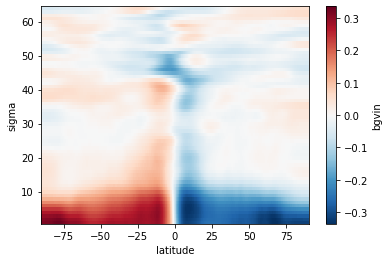

In [20]:
ncep_b.balprojs['bgvin'].plot()

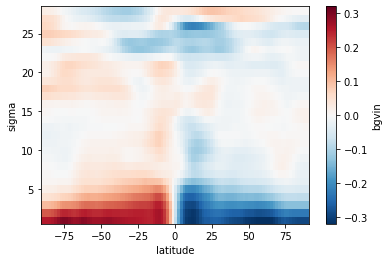

In [21]:
cptec_b.balprojs['bgvin'].plot()

Para comparar os coeficientes de projeção das matrizes instanciadas por `ncep_b` e `cptec_b`, pode-se seguir os exemplos a seguir.

Observe que os coeficientes de projeção da temperatura `agvin`, para as instâncias `ncep_b` e `cptec_b`, possuem uma dimensão extra denominada `sigma_2`. Esta dimensão extra precisa ser fixada para um dos níveis contidos nas instâncias. Utilize o comando `ncep_b.levs` e `cptec_b.levs` para obter os valores possíveis para isto (fazendo-se `isel(sigma_2=0)` escolhe-se o primeiro nível, próximo à superfície e `isel(sigma_2=-1)` escolhe-se o último nível, próximo ao topo do modelo).

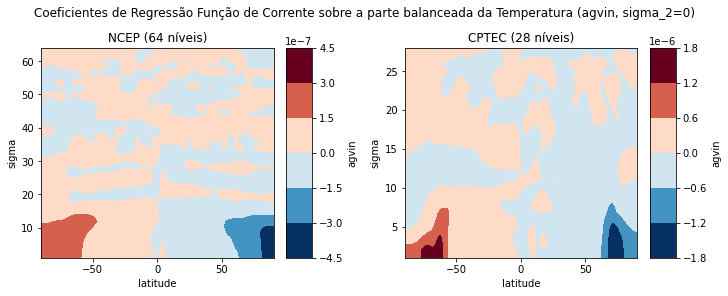

In [23]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.balprojs['agvin'].isel(sigma_2=0).plot.contourf(ax=ax[0])#, vmin=0, vmax=5e-7)
cptec_b.balprojs['agvin'].isel(sigma_2=0).plot.contourf(ax=ax[1])#, vmin=0, vmax=5e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Coeficientes de Regressão Função de Corrente sobre a parte balanceada da Temperatura (agvin, sigma_2=0)')
plt.show()

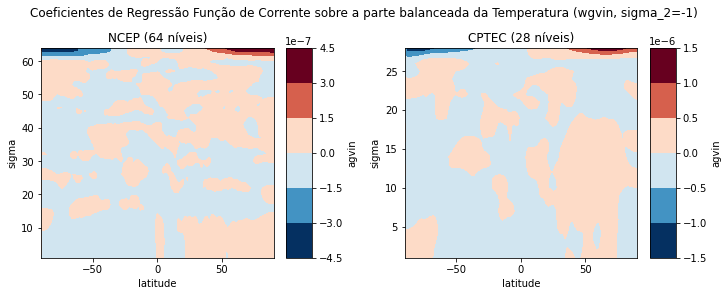

In [24]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.balprojs['agvin'].isel(sigma_2=-1).plot.contourf(ax=ax[0])#, vmin=0, vmax=5e-7)
cptec_b.balprojs['agvin'].isel(sigma_2=-1).plot.contourf(ax=ax[1])#, vmin=0, vmax=5e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Coeficientes de Regressão Função de Corrente sobre a parte balanceada da Temperatura (wgvin, sigma_2=-1)')
plt.show()

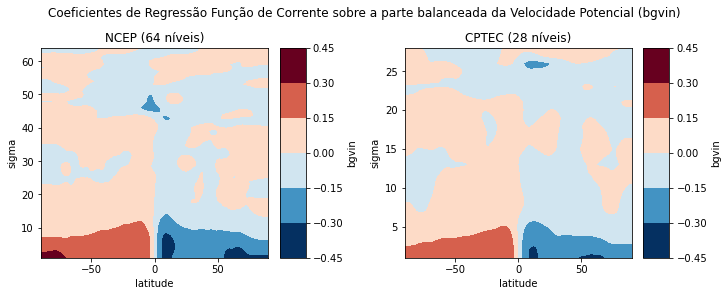

In [25]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.balprojs['bgvin'].plot.contourf(ax=ax[0])#, vmin=0, vmax=0.5)
cptec_b.balprojs['bgvin'].plot.contourf(ax=ax[1])#, vmin=0, vmax=0.5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Coeficientes de Regressão Função de Corrente sobre a parte balanceada da Velocidade Potencial (bgvin)')
plt.show()

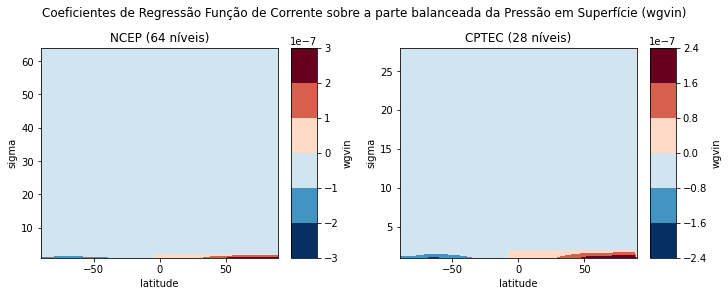

In [26]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.balprojs['wgvin'].plot.contourf(ax=ax[0])#, vmin=-3e-7, vmax=3e-7)
cptec_b.balprojs['wgvin'].plot.contourf(ax=ax[1])#, vmin=-3e-7, vmax=3e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Coeficientes de Regressão Função de Corrente sobre a parte balanceada da Pressão em Superfície (wgvin)')
plt.show()

Para verificar e comparar as amplitudes das instâncias `ncep_b` e `cptec_b`, siga os exemplos a seguir.

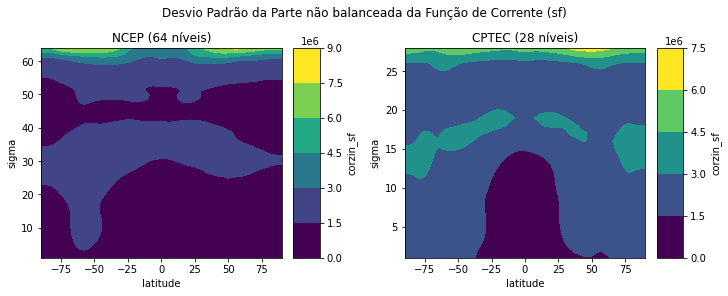

In [27]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['sf'].plot.contourf(ax=ax[0])#, vmin=0, vmax=6e6)
cptec_b.amplitudes['sf'].plot.contourf(ax=ax[1])#, vmin=0, vmax=6e6)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Desvio Padrão da Parte não balanceada da Função de Corrente (sf)')
plt.show()

No exemplo a seguir, são comparados os perfis verticais com as amplitudes de `sf` das instâncias `ncep_b` e `cptec_b`:

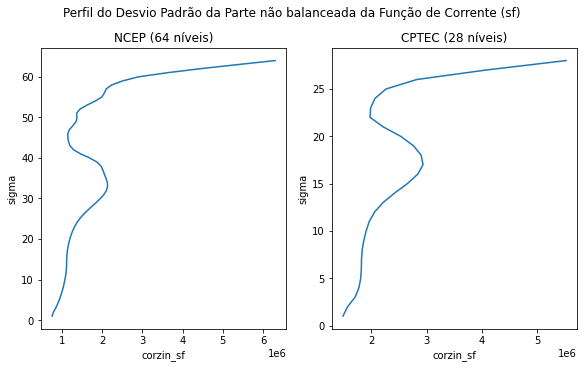

In [28]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['sf'].mean(dim='latitude').plot(ax=ax[0], y='sigma')
cptec_b.amplitudes['sf'].mean(dim='latitude').plot(ax=ax[1], y='sigma')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Perfil do Desvio Padrão da Parte não balanceada da Função de Corrente (sf)')
plt.show()

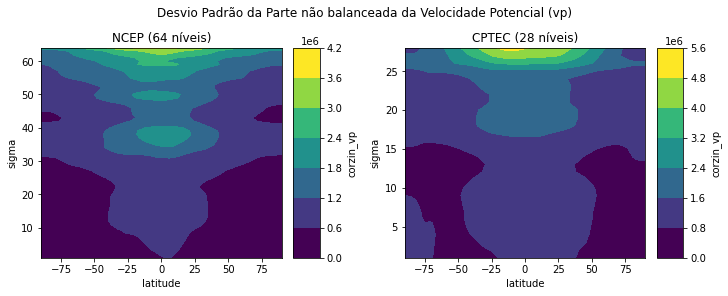

In [29]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['vp'].plot.contourf(ax=ax[0])#, vmin=0, vmax=6e6)
cptec_b.amplitudes['vp'].plot.contourf(ax=ax[1])#, vmin=0, vmax=6e6)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Desvio Padrão da Parte não balanceada da Velocidade Potencial (vp)')
plt.show()

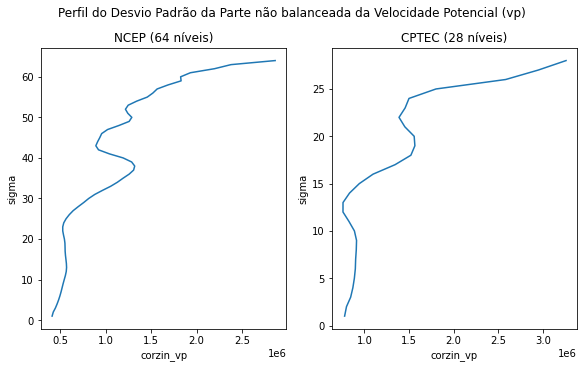

In [30]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['vp'].mean(dim='latitude').plot(ax=ax[0], y='sigma')
cptec_b.amplitudes['vp'].mean(dim='latitude').plot(ax=ax[1], y='sigma')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Perfil do Desvio Padrão da Parte não balanceada da Velocidade Potencial (vp)')
plt.show()

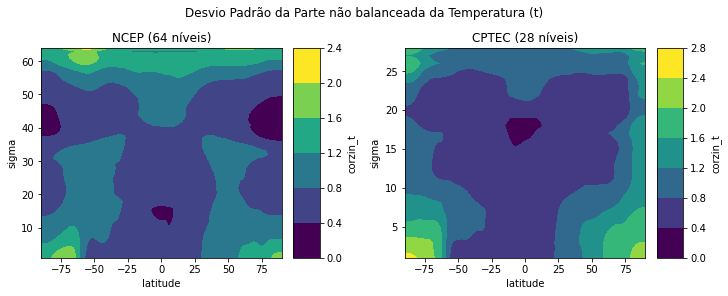

In [31]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['t'].plot.contourf(ax=ax[0])#, vmin=0, vmax=5)
cptec_b.amplitudes['t'].plot.contourf(ax=ax[1])#, vmin=0, vmax=5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Desvio Padrão da Parte não balanceada da Temperatura (t)')
plt.show()

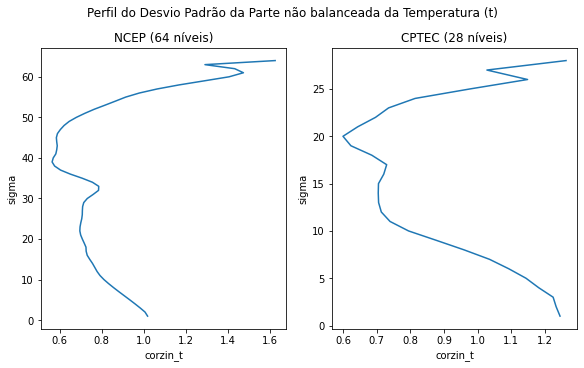

In [32]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['t'].mean(dim='latitude').plot(ax=ax[0], y='sigma')
cptec_b.amplitudes['t'].mean(dim='latitude').plot(ax=ax[1], y='sigma')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Perfil do Desvio Padrão da Parte não balanceada da Temperatura (t)')
plt.show()

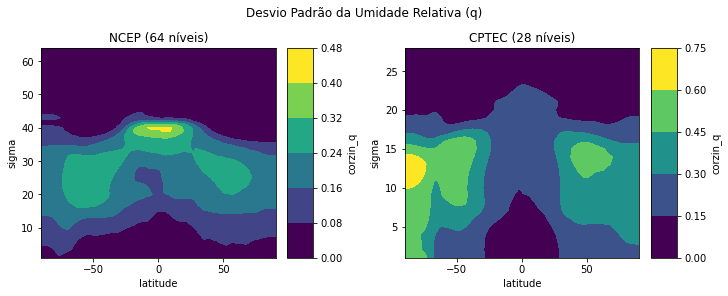

In [33]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['q'].plot.contourf(ax=ax[0])#, vmin=0, vmax=0.5)
cptec_b.amplitudes['q'].plot.contourf(ax=ax[1])#, vmin=0, vmax=0.5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Desvio Padrão da Umidade Relativa (q)')
plt.show()

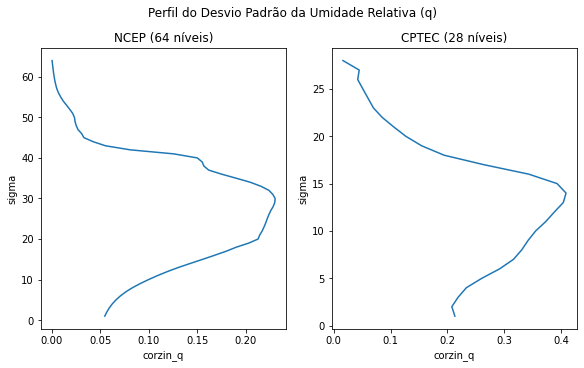

In [34]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['q'].mean(dim='latitude').plot(ax=ax[0], y='sigma')
cptec_b.amplitudes['q'].mean(dim='latitude').plot(ax=ax[1], y='sigma')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Perfil do Desvio Padrão da Umidade Relativa (q)')
plt.show()

In [35]:
#fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))
#
#ncep_b.amplitudes['qin'].plot.contourf(ax=ax[0])#, vmin=0, vmax=0.5)
#cptec_b.amplitudes['qin'].plot.contourf(ax=ax[1])#, vmin=0, vmax=0.5)

In [36]:
#fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))
#
#ncep_b.amplitudes['qin'].mean(dim='latitude').plot(ax=ax[0], y='sigma')
#cptec_b.amplitudes['qin'].mean(dim='latitude').plot(ax=ax[1], y='sigma')

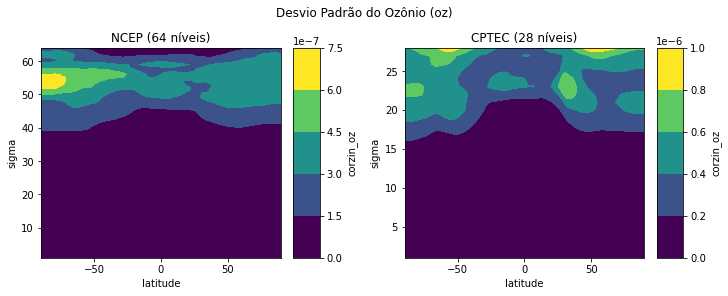

In [37]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['oz'].plot.contourf(ax=ax[0])#, vmin=0, vmax=7.5e-7)
cptec_b.amplitudes['oz'].plot.contourf(ax=ax[1])#, vmin=0, vmax=7.5e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Desvio Padrão do Ozônio (oz)')
plt.show()

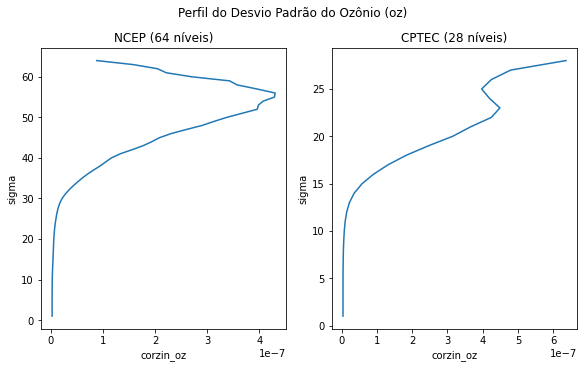

In [38]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['oz'].mean(dim='latitude').plot(ax=ax[0], y='sigma')
cptec_b.amplitudes['oz'].mean(dim='latitude').plot(ax=ax[1], y='sigma')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Perfil do Desvio Padrão do Ozônio (oz)')
plt.show()

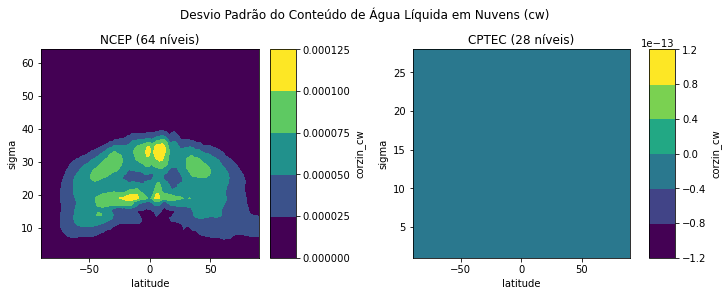

In [39]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['cw'].plot.contourf(ax=ax[0])#, vmin=0, vmax=7.5e-7)
cptec_b.amplitudes['cw'].plot.contourf(ax=ax[1])#, vmin=0, vmax=7.5e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Desvio Padrão do Conteúdo de Água Líquida em Nuvens (cw)')
plt.show()

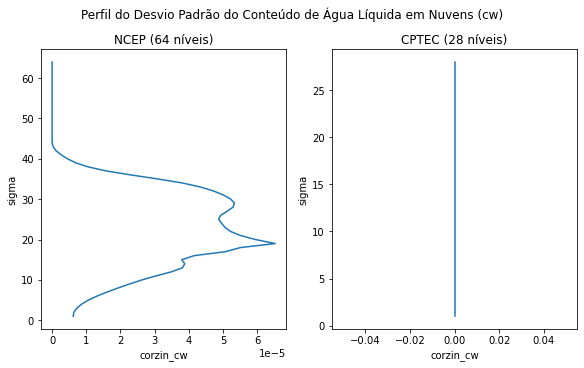

In [40]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['cw'].mean(dim='latitude').plot(ax=ax[0], y='sigma')
cptec_b.amplitudes['cw'].mean(dim='latitude').plot(ax=ax[1], y='sigma')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Perfil do Desvio Padrão do Conteúdo de Água Líquida em Nuvens (cw)')
plt.show()

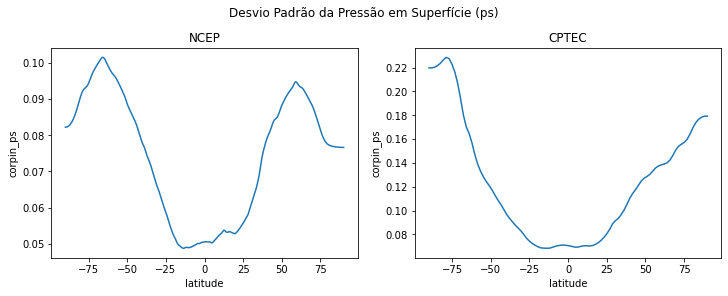

In [41]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['ps'].plot(ax=ax[0])#, vmin=0, vmax=0.2)
cptec_b.amplitudes['ps'].plot(ax=ax[1])#, vmin=0, vmax=0.2)

ax[0].set_title('NCEP')
ax[1].set_title('CPTEC')

plt.suptitle('Desvio Padrão da Pressão em Superfície (ps)')
plt.show()

Nas figuras a seguir, são mostradas as aplitudes de `sst` das instâncias `ncep_b` e `cptec_b`.

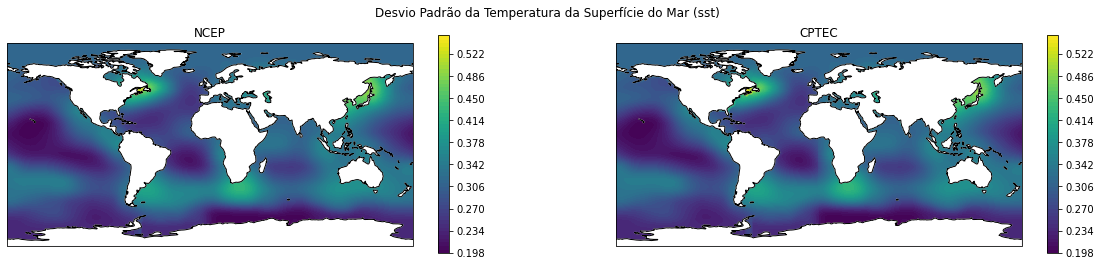

In [42]:
plt.figure(figsize=(20,4))#, constrained_layout=True)

ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'))
obj1 = ax1.contourf(ncep_b.lons, ncep_b.lats, ncep_b.amplitudes['sst'], 60, transform=ccrs.PlateCarree())
plt.colorbar(obj1)
ax1.coastlines()

ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'))
obj2 = ax2.contourf(cptec_b.lons, cptec_b.lats, cptec_b.amplitudes['sst'], 60, transform=ccrs.PlateCarree())
plt.colorbar(obj2)
ax2.coastlines()

ax1.set_title('NCEP')
ax2.set_title('CPTEC')

plt.suptitle('Desvio Padrão da Temperatura da Superfície do Mar (sst)')
plt.show()

Assim como as amplitudes, os comprimentos de escala horizontais das instâncias `ncep_b` e `cptec_b` também podem ser comparadas. Veja os exemplos a seguir:

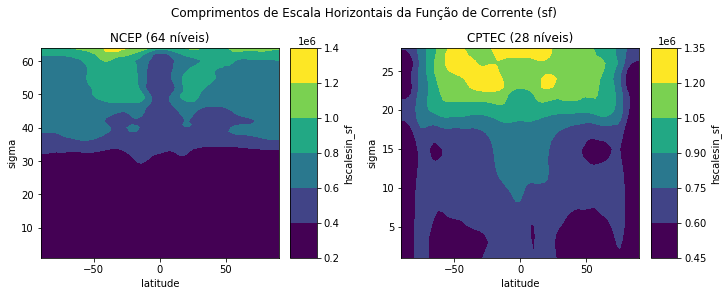

In [43]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['sf'].plot.contourf(ax=ax[0])#, vmin=0, vmax=1.5e6)
cptec_b.hscales['sf'].plot.contourf(ax=ax[1])#, vmin=0, vmax=1.5e6)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Horizontais da Função de Corrente (sf)')
plt.show()

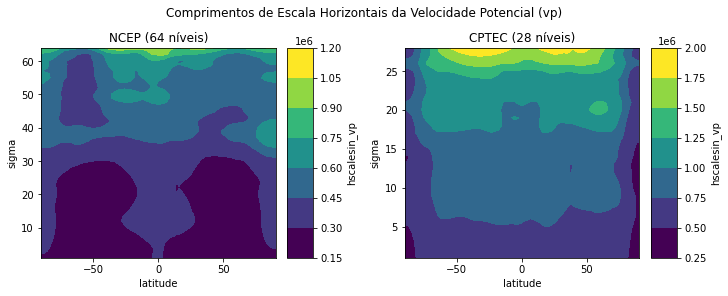

In [44]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['vp'].plot.contourf(ax=ax[0])#, vmin=0, vmax=1.5e6)
cptec_b.hscales['vp'].plot.contourf(ax=ax[1])#, vmin=0, vmax=1.5e6)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Horizontais da Velocidade Potencial (vp)')
plt.show()

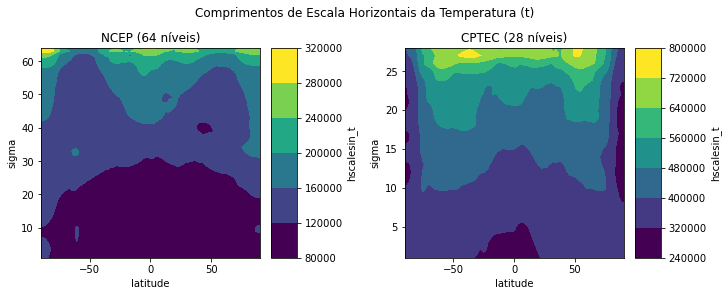

In [45]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['t'].plot.contourf(ax=ax[0])#, vmin=0, vmax=3.5e5)
cptec_b.hscales['t'].plot.contourf(ax=ax[1])#, vmin=0, vmax=3.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Horizontais da Temperatura (t)')
plt.show()

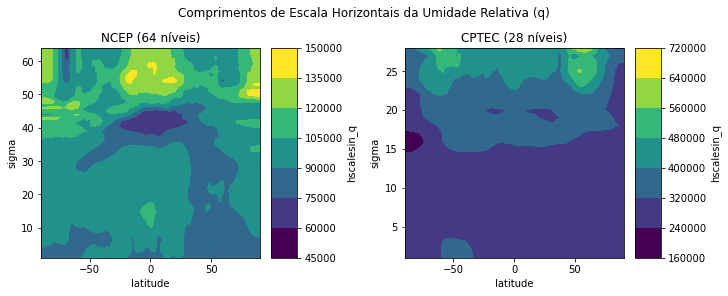

In [46]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['q'].plot.contourf(ax=ax[0])#, vmin=0, vmax=1.5e5)
cptec_b.hscales['q'].plot.contourf(ax=ax[1])#, vmin=0, vmax=1.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Horizontais da Umidade Relativa (q)')
plt.show()

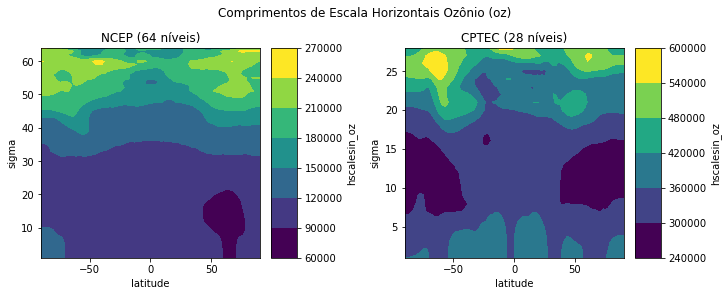

In [47]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['oz'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.hscales['oz'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Horizontais Ozônio (oz)')
plt.show()

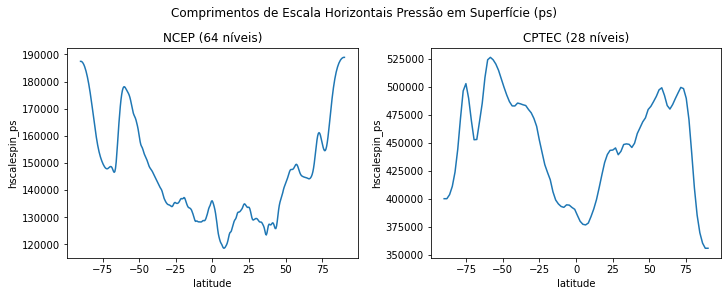

In [48]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['ps'].plot(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.hscales['ps'].plot(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Horizontais Pressão em Superfície (ps)')
plt.show()

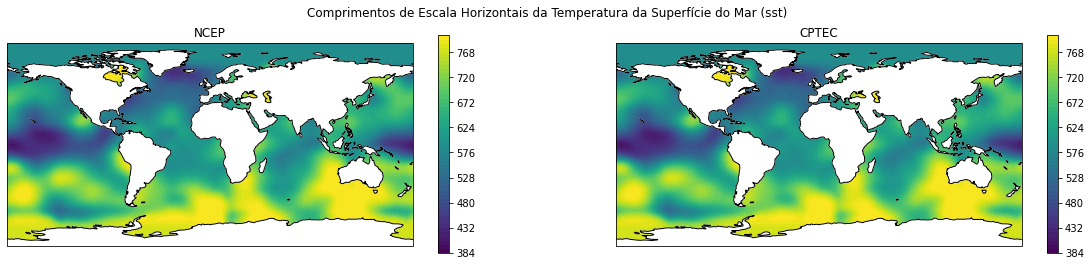

In [49]:
plt.figure(figsize=(20,4))#, constrained_layout=True)

ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'))
obj1 = ax1.contourf(ncep_b.lons, ncep_b.lats, ncep_b.hscales['sst'], 60, transform=ccrs.PlateCarree())
plt.colorbar(obj1)
ax1.coastlines()

ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'))
obj2 = ax2.contourf(cptec_b.lons, cptec_b.lats, cptec_b.hscales['sst'], 60, transform=ccrs.PlateCarree())
plt.colorbar(obj2)
ax2.coastlines()

ax1.set_title('NCEP')
ax2.set_title('CPTEC')

plt.suptitle('Comprimentos de Escala Horizontais da Temperatura da Superfície do Mar (sst)')
plt.show()

Assim como as amplitudes e os comprimentos de escala horizontais, os comprimentos de escala verticais das instâncias `ncep_b` e `cptec_b` também podem ser comparadas. Veja os exemplos a seguir:

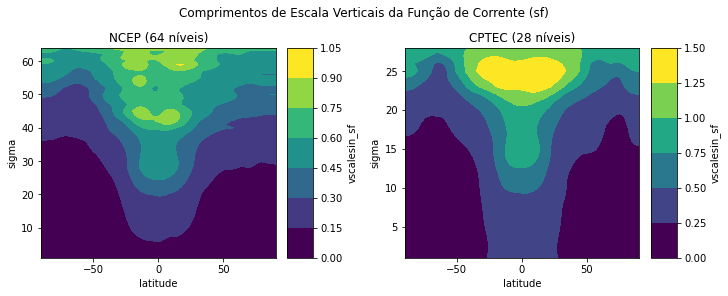

In [50]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['sf'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['sf'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Verticais da Função de Corrente (sf)')
plt.show()

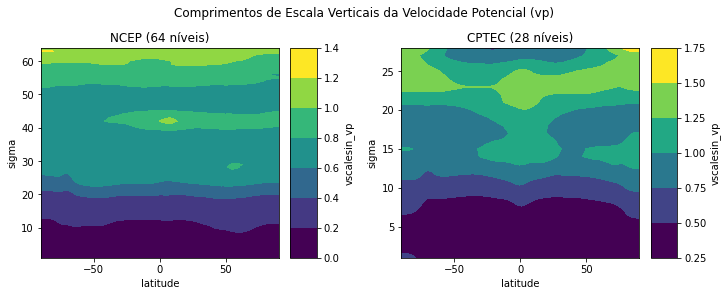

In [51]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['vp'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['vp'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Verticais da Velocidade Potencial (vp)')
plt.show()

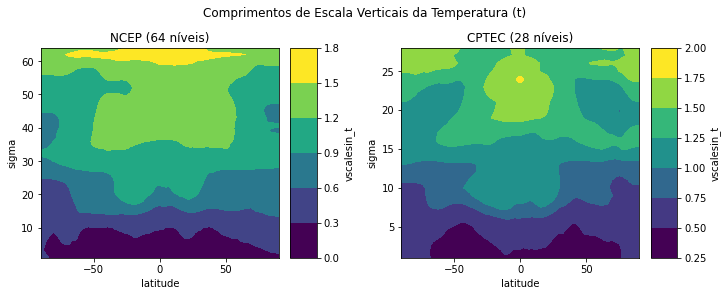

In [52]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['t'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['t'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Verticais da Temperatura (t)')
plt.show()

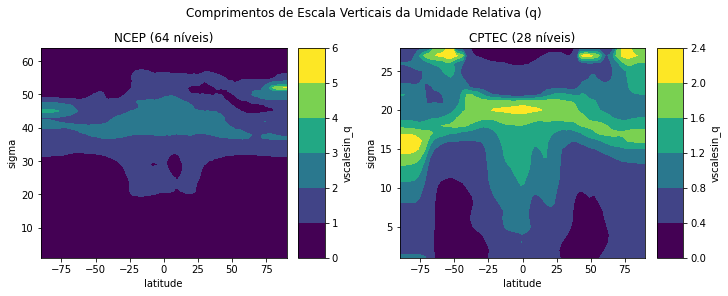

In [53]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['q'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['q'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Verticais da Umidade Relativa (q)')
plt.show()

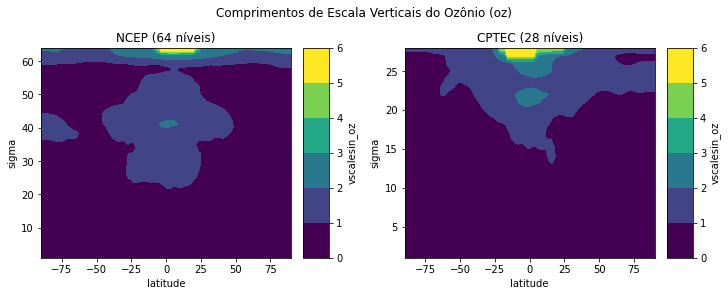

In [54]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['oz'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['oz'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Verticais do Ozônio (oz)')
plt.show()

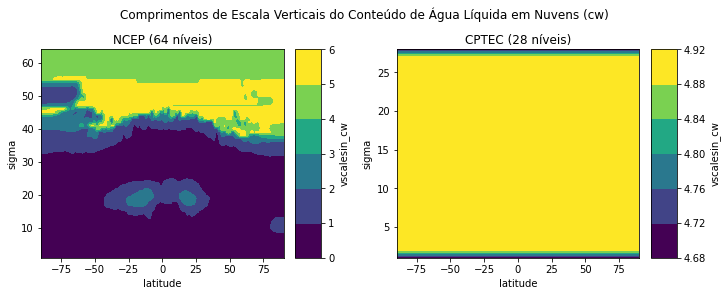

In [55]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['cw'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['cw'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Comprimentos de Escala Verticais do Conteúdo de Água Líquida em Nuvens (cw)')
plt.show()